In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! git clone https://github.com/NVIDIA/apex

Cloning into 'apex'...
remote: Enumerating objects: 11106, done.
remote: Counting objects: 100% (232/232), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 11106 (delta 129), reused 181 (delta 105), pack-reused 10874
Receiving objects: 100% (11106/11106), 15.38 MiB | 2.17 MiB/s, done.
Resolving deltas: 100% (7675/7675), done.


In [3]:
! cd apex
! pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" /content/apex/

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
DEPRECATION: --build-option and --global-option are deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859
Processing ./apex
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.2 MB/s eta 0:00:00
    Getting requirements to build wheel: started
    Running command Getting requirements to build wheel
    running egg_info
    writing setuptools.egg-info/PKG-INFO
    writing dependency_links to setuptools.egg-info/dependency_links.txt
    writing entry points to setuptools.egg-info/entry_points.txt
    writing requirements to setuptools.egg-info/requires.txt
    writing top-level names to setuptools.egg-info/top_level.txt
    reading mani

In [2]:
import torch

In [3]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 98.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 kB 27.8 MB/s eta 0:00:00


In [4]:
!pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 54.5 MB/s eta 0:00:00


In [5]:
!pip install transformers

In [6]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from pyvi.ViTokenizer import ViTokenizer
import re

In [7]:
# load data
train = pd.read_csv("/content/drive/MyDrive/ProcessingData/train.csv", index_col=False)
dev = pd.read_csv("/content/drive/MyDrive/ProcessingData/val.csv", index_col=False)
test = pd.read_csv("/content/drive/MyDrive/ProcessingData/val.csv", index_col=False)

train.reset_index(drop=True)

print(len(train))
print(len(dev))
print(len(test))


5665
809
809


In [8]:
#pre-process

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def preprocess(text, tokenized=True, lowercased=True):
    text = deEmojify(text)
    return text

def pre_process_features(X, y, tokenized=True, lowercased=True):
    X = [preprocess(str(p), tokenized=tokenized, lowercased=lowercased) for p in list(X)]
    for idx, ele in enumerate(X):
        if not ele:
            np.delete(X, idx)
            np.delete(y, idx)
    return X, y

X_train = train['Comment']
y_train = train['Label'].values

X_dev = dev['Comment']
y_dev = dev['Label'].values

X_test = test['Comment']
y_test = test['Label'].values

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dens

Epoch:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 0 of 15:   0%|          | 0/89 [00:00<?, ?it/s]

Running Epoch 1 of 15:   0%|          | 0/89 [00:00<?, ?it/s]

Running Epoch 2 of 15:   0%|          | 0/89 [00:00<?, ?it/s]

Running Epoch 3 of 15:   0%|          | 0/89 [00:00<?, ?it/s]

Running Epoch 4 of 15:   0%|          | 0/89 [00:00<?, ?it/s]

Running Epoch 5 of 15:   0%|          | 0/89 [00:00<?, ?it/s]

Running Epoch 6 of 15:   0%|          | 0/89 [00:00<?, ?it/s]

Running Epoch 7 of 15:   0%|          | 0/89 [00:00<?, ?it/s]

Running Epoch 8 of 15:   0%|          | 0/89 [00:00<?, ?it/s]

Running Epoch 9 of 15:   0%|          | 0/89 [00:00<?, ?it/s]

Running Epoch 10 of 15:   0%|          | 0/89 [00:00<?, ?it/s]

Running Epoch 11 of 15:   0%|          | 0/89 [00:00<?, ?it/s]

Running Epoch 12 of 15:   0%|          | 0/89 [00:00<?, ?it/s]

Running Epoch 13 of 15:   0%|          | 0/89 [00:00<?, ?it/s]

Running Epoch 14 of 15:   0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/809 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/13 [00:00<?, ?it/s]

[[585  10  13]
 [ 17 121   9]
 [ 16  16  22]]
F1 - micro: 0.899876390605686
F1 - macro: 0.7421439483895789
Accuracy: 0.899876390605686


<Axes: >

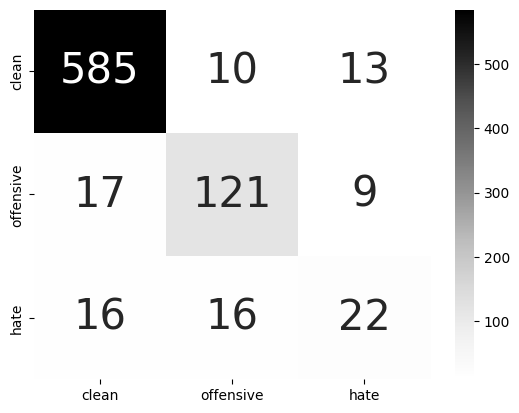

In [10]:
#XLM-R

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

train_X, train_y = pre_process_features(X_train, y_train, tokenized=True, lowercased = False)
dev_X, dev_y = pre_process_features(X_dev, y_dev, tokenized=True, lowercased = False)
test_X, test_y = pre_process_features(X_test, y_test, tokenized=True, lowercased = False)

train = pd.DataFrame({'text': train_X, 'labels': train_y})
dev = pd.DataFrame({'text': dev_X, 'labels': dev_y})
test = pd.DataFrame({'text': test_X, 'labels': test_y})

model_args = ClassificationArgs()
model_args.output_dir = "/content/drive/MyDrive/xlm-r-v2/"
model_args.reprocess_input_data = True
model_args.overwrite_output_dir = True
model_args.evaluate_during_training = False
model_args.manual_seed = 4
model_args.use_multiprocessing = True
model_args.train_batch_size = 64
model_args.eval_batch_size = 64
model_args.labels_list = [0, 1, 2]
model_args.max_seq_length = 100
model_args.num_train_epochs = 15

model = ClassificationModel('xlmroberta', 'xlm-roberta-base', num_labels=3, args=model_args)

model.train_model(train, validation_data=dev)

result, model_outputs, wrong_predictions = model.eval_model(test)

label_true_test = test.labels.values
label_pred_test = model_outputs.argmax(axis=-1)

y_pred = label_pred_test.tolist()
y_true = label_true_test.tolist()

cf3 = confusion_matrix(y_true, y_pred)
print(cf3)

evaluation = f1_score(y_true, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(y_true, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

evaluation = accuracy_score(y_true, y_pred)
print("Accuracy: " + str(evaluation))

# test_data['predict_label_id'] = y_pred
# test_data.to_csv('drive/My Drive/CODE/HSD/test_predicted.csv', index=False)

df_cm3 = pd.DataFrame(cf3, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm3, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})

In [16]:
wrong_predictions

[{'guid': 3, 'text_a': 'sặc', 'text_b': None, 'label': 0},
 {'guid': 6, 'text_a': 'flồn fcac', 'text_b': None, 'label': 2},
 {'guid': 11, 'text_a': 'bố mày', 'text_b': None, 'label': 1},
 {'guid': 28, 'text_a': 'gái mẹ m', 'text_b': None, 'label': 2},
 {'guid': 30, 'text_a': 'cá_sấu mắc_cạn', 'text_b': None, 'label': 2},
 {'guid': 43, 'text_a': 'mãi ủng_hộ bá điền, keme kênh chat bẩn', 'text_b': None, 'label': 1},
 {'guid': 60, 'text_a': 't chê sân_khấu. giao_diện liên minh huyền thoại trông thập_niên 80-90, ui lồn dạo hạch', 'text_b': None, 'label': 2},
 {'guid': 63, 'text_a': 'ngộ đấm mồm bắn', 'text_b': None, 'label': 0},
 {'guid': 81, 'text_a': 'kênh quốc_tế toàn spam gam time', 'text_b': None, 'label': 0},
 {'guid': 84, 'text_a': 'anh em account pbe lồn xong chat server', 'text_b': None, 'label': 0},
 {'guid': 94, 'text_a': 'đừng chê mc xấu mấy mẹ, quần què', 'text_b': None, 'label': 2},
 {'guid': 100, 'text_a': 'chào ngài, nhác comment', 'text_b': None, 'label': 0},
 {'guid': 106

In [14]:
model_outputs

array([[ 5.41015625, -3.03125   , -1.90917969],
       [ 5.484375  , -2.32421875, -2.72851562],
       [ 5.19921875, -3.0546875 , -1.65527344],
       ...,
       [ 4.609375  , -1.74707031, -2.453125  ],
       [ 5.04296875, -3.10546875, -1.48046875],
       [ 5.23046875, -1.80175781, -2.98828125]])

<bound method DataFrame.info of                                                   text  labels
0                                      1010 sp 12 10ad       0
1                                                 7 mr       0
2    hở tí học_sinh cúp học net: v tuần nghỉ lí_do net       0
3                                                  sặc       0
4                                         bo5 đấy hoài       0
..                                                 ...     ...
804                                        ảo game bro       2
805                          oai boài game sủa súc_vật       2
806                           kêu bac tổn luồi chết mm       2
807                                        chược nguột       0
808                                                nan       0

[809 rows x 2 columns]>

In [24]:
for i in range(len(y_pred)):
  if y_pred[i] != test.labels.values[i]:
    print(test.text.values[i],'|',y_pred[i],'|',test.labels.values[i])

sặc | 1 | 0
flồn fcac | 1 | 2
bố mày | 0 | 1
gái mẹ m | 1 | 2
cá_sấu mắc_cạn | 0 | 2
mãi ủng_hộ bá điền, keme kênh chat bẩn | 0 | 1
t chê sân_khấu. giao_diện liên minh huyền thoại trông thập_niên 80-90, ui lồn dạo hạch | 1 | 2
ngộ đấm mồm bắn | 2 | 0
kênh quốc_tế toàn spam gam time | 2 | 0
anh em account pbe lồn xong chat server | 2 | 0
đừng chê mc xấu mấy mẹ, quần què | 1 | 2
chào ngài, nhác comment | 2 | 0
bình_luận trả_bài | 0 | 2
thresh chán vãi cặc | 1 | 2
đéo động vao no | 1 | 0
khoái khoái chảy nước_miếng | 1 | 0
thua lồn con_mẹ mafyh | 1 | 2
nhma khứa chết ngài anh em awesome | 2 | 0
m choi da | 0 | 2
nít đánh cm feed lòi bím | 1 | 0
jackz đẹp_trai vãi chưởng | 0 | 1
quê ác | 0 | 1
đi mấy nhóc | 2 | 0
3 huỷ_diệt:))))))) bá đần | 2 | 1
bệnh thiểu_năng lây đường internet nha anh em | 0 | 1
hde gà, đồ toàn dame | 0 | 2
vua solo c4 2 viên bò | 2 | 0
ca_ve | 1 | 2
2 thằng đéo | 1 | 2
team việt nam mấy đứa gáy | 0 | 2
tao nhảy chết mẹ | 2 | 1
mặc váy live đi dà | 0 | 2
chán lắm l.kia